In [51]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from scipy.interpolate import UnivariateSpline
import numpy as np
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import sys
sys.path.append("../")

### Import Desired Tires

In [52]:
all_tires = {
    "Hoosier_16x6.0-10_LCO_6_cornering":{"long":None, "lat":None},
    "Hoosier_16x6.0-10_LCO_7_cornering":{"long":None, "lat":None},
    "Hoosier_16x6.0-10_R20_6_cornering":{"long":None, "lat":None},
    "Hoosier_16x6.0-10_R20_7_cornering":{"long":None, "lat":None},
    "Hoosier_16x7.5-10_LCO_7_cornering":{"long":None, "lat":None},
    "Hoosier_16x7.5-10_LCO_8_cornering":{"long":None, "lat":None},
    "Hoosier_16x7.5-10_R20_7_cornering":{"long":None, "lat":None},
    "Hoosier_16x7.5-10_R20_8_cornering":{"long":None, "lat":None},
}

### Filter Data

In [53]:
camber = 0 # default camber
pressure = 12 * 6.89476 # default pressure
velocity = 25 * 1.60934 # default velocity
slip_angle = 0
tire_scaling = 2/3

tire_dict = all_tires.items()

for name, tire in tire_dict:
    try:
        df = pd.read_csv(f"../processing/results/{name}.csv")
        tire["long"] = df[(df["pressure"] == pressure) & (df["velocity"] == velocity) & (df["camber"] == camber) & (df["slip"] == slip_angle)]
    except:
        print("Error getting long data for {0}".format(name))

    try:
        df = pd.read_csv(f"../processing/results/{name}.csv")
        tire["lat"] = df[((df["velocity"] == velocity) & (df["pressure"] == pressure) & (df["camber"] == camber))]
    except:
        print("Error getting lateral data for {0}".format(name))

### Calculate Peak FY and Isolate Respective SA

In [54]:
tires = []
SA_peak_FY = []
FZ_lst = []

normal_loads = sorted(np.array(tire["lat"]["load"].unique()))

for name, tire in all_tires.items():
    SA_vals = []
    FZ_current = []
    for load in normal_loads:
        # plt.figure()
        temp = tire["lat"][tire["lat"]["load"] == load]
        FY_max_min = [min(temp["FY"]), max(temp["FY"])]
        abs_max_FY = max([abs(x) for x in FY_max_min])
        if abs_max_FY not in FY_max_min:
            abs_max_FY *= -1
        
        peak_FY_SA = abs(tire["lat"][tire["lat"]["FY"] == abs_max_FY]["SA"].tolist()[0])
        SA_vals.append(peak_FY_SA)
        FZ_current.append(load)

        # print(peak_FY_SA)

        # plt.title(f"{load}")
        # plt.plot(temp["SA"], temp["FY"])
    
    SA_peak_FY.append(SA_vals)
    FZ_lst.append(FZ_current)
    tires.append(name[:23])

### Plot peak SA vs FZ

Text(0, 0.5, 'SA (deg)')

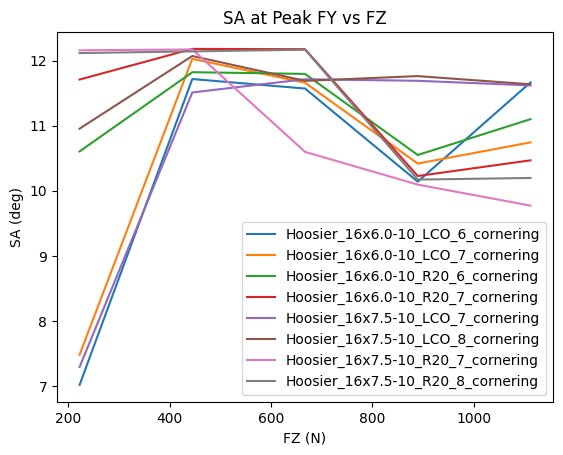

In [55]:
for i in range(len(tires)):
    reversed_SA = SA_peak_FY[i][::-1]
    adjusted_FZ = sorted(-1 * np.array(FZ_lst[i]))
    plt.plot(adjusted_FZ, reversed_SA)

plt.legend(tires)
plt.title("SA at Peak FY vs FZ")
plt.xlabel("FZ (N)")
plt.ylabel("SA (deg)")